This notebook shows how to **define** and **visualize** basic bullt-in **vector fields**.

# IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

from spomso.cores.helper_functions import generate_grid, smarter_reshape, vector_smarter_reshape

from spomso.cores.geom_vector import RadialSphericalVectorField
from spomso.cores.geom_vector import RadialCylindricalVectorField, HyperbolicCylindricalVectorField
from spomso.cores.geom_vector import AngledRadialCylindricalVectorField, WindingCylindricalVectorField
from spomso.cores.geom_vector import VortexCylindricalVectorField, AngledVortexCylindricalVectorField
from spomso.cores.geom_vector import XVectorField, YVectorField, ZVectorField

# PARAMETERS

In [2]:
# size of the volume
co_size = 4, 4, 4
# resolution of the volume
co_resolution = 100, 100, 5

# show 2D cross-section along the z-axis
show_midplane = True
# index of the cross-section along the z-axis
depth_index = 2
# 1/decimate of total vectors are shown in the cross-section
decimate = 5

# show a 3D plot
show_3d = False

There are several **vector field** functions included with the package:

* RADIAL_SPHERICAL
* RADIAL_CYLINDRICAL
* HYPERBOLIC_CYLINDRICAL
* AWN
* AAR
* VORTEX
* AAV
* X, Y, Z



# COORDINATE SYSTEM

Point cloud of coordinates is created with the **generate_grid** function, which takes the size of the coordinate system and the number of points in each direction (**co_resolution**).

In [3]:
coor, co_res_new = generate_grid(co_size, co_resolution)

If there is an even number of points along any direction the function will automatically convert it to an odd number, therefore the origin is always included in the point cloud. The point cloud is a **numpy.ndarray** with a shape of **(D, N)**, where **D** is the number of dimensions and **N** is the number of data points.

# CREATE VECTOR FIELDS

Create the selected **vector field**:

## RADIAL SPHERICAL

**Vector field** where all the vectors point outwards from the origin.

In [ ]:
final = RadialSphericalVectorField()

## RADIAL CYLINDRICAL

**Vector field** where all the vectors point outwards from the origin in the **xy** plane and the **z** component is zero.

In [ ]:
final = RadialCylindricalVectorField()

## HYPERBOLIC CYLINDRICAL

Hyperbolic **vector field** https://en.wikipedia.org/wiki/Hyperbolic_equilibrium_point.

In [ ]:
final = HyperbolicCylindricalVectorField()

## AWN - Arbitrary Winding Number radial vector field

**Vector field** where the **z** component is zero, the **x**, and **y** components change to satisfy a certain **winding number**, in this case it is set to **2**, but can also be a negative or a non-integer number.

In [ ]:
final = WindingCylindricalVectorField(2)

## AAR - Arbitrary Angle Radial vector field

**Vector field** where all the vectors point outwards, at the specified **angle**, in the **xy** plane. In this case the angle is set to **$\pi$/6**.

In [ ]:
final = AngledRadialCylindricalVectorField(np.pi/6)

## VORTEX

vortex **vector field** https://en.wikipedia.org/wiki/Vorticity.

In [4]:
final = VortexCylindricalVectorField()

## AAV - Arbitrary Angle Vortex radial vector field

**vortex vector field** but the vectors are at an **angle** compared to the vectors in the **vortex vector field**, in this case the **angle** is set to **$\pi$/6**.

In [ ]:
final = AngledVortexCylindricalVectorField(np.pi/6)

## X

All vectors point in the **+x** direction.

In [ ]:
final = XVectorField()

## Y

All vectors point in the **+y** direction.

In [ ]:
final = YVectorField()

## Z

All vectors point in the **+z** direction.

In [ ]:
final = ZVectorField()

## EVALUATE

Evaluate the **vector field** functions to create a map of the **vector field**. This is done by calling the **create** method and passing in the point cloud of coordinates:

In [5]:
final_pattern = final.create(coor)

# EXTRACT

Extract the **x**, **y**, and **z** components of the **vector field**:

In [6]:
x = final.x(coor)
y = final.y(coor)
z = final.z(coor)

Extract the **phi** (azimuthal), **theta** (polar) angles and vector **lengths**:

In [7]:
phi = final.phi(coor)
theta = final.theta(coor)
length = final.length(coor)

Convert the field maps into grids:

In [8]:
field = vector_smarter_reshape(final_pattern, co_resolution)
x = smarter_reshape(x, co_resolution)
y = smarter_reshape(y, co_resolution)
z = smarter_reshape(z, co_resolution)
phi = smarter_reshape(phi, co_resolution)
theta = smarter_reshape(theta, co_resolution)
length = smarter_reshape(length, co_resolution)

# PLOT

Drawing results...


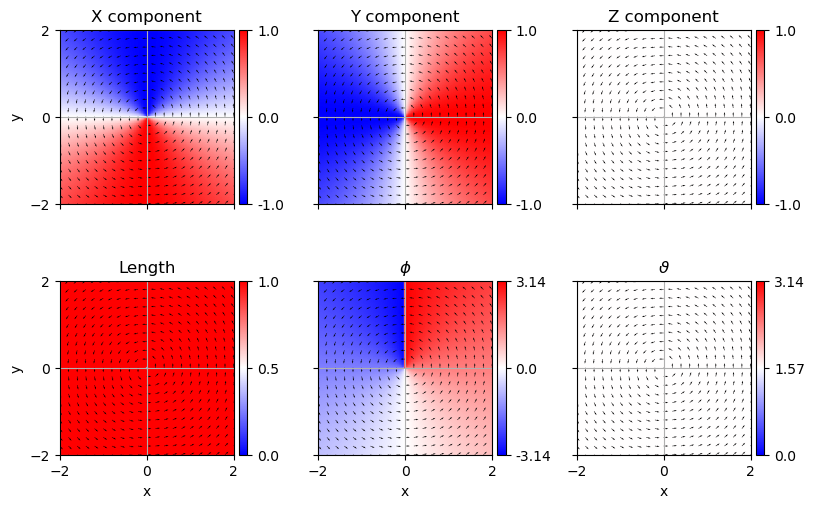

In [9]:
print("Drawing results...")
if show_midplane:
    fig, axs = plt.subplots(2, 3, figsize=(8.25, 2*8.25/3), sharex="col", sharey="row")


    patterns = ((x, y, z), (length, phi, theta))
    titles = (("X component", "Y component", "Z component"), ("Length", r"$\phi$", r"$\vartheta$"))
    mins = ((-1, -1, -1), (0, -np.pi, 0))
    maxs = ((1, 1, 1), (1, np.pi, np.pi))

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]

            divider = make_axes_locatable(ax)
            cax = divider.append_axes('right', size='5%', pad=0.05)

            f = ax.imshow(patterns[i][j][:, :, depth_index].T,
                      cmap="bwr",
                      extent=(-co_size[0]/2, co_size[0]/2,
                              -co_size[1]/2, co_size[1]/2),
                      origin="lower",
                          vmin=mins[i][j],
                          vmax=maxs[i][j]
                      )

            cbar = fig.colorbar(f, cax=cax)
            cbar.set_ticks(np.linspace(mins[i][j], maxs[i][j], 3))
            cbar.set_ticklabels(np.round(np.linspace(mins[i][j], maxs[i][j], 3), 2))

            ax.set_xticks(np.linspace(-co_size[0]/2, co_size[0]/2, 3))
            ax.set_yticks(np.linspace(-co_size[1]/2, co_size[1]/2, 3))
            ax.grid()

            ax.quiver(smarter_reshape(coor[0], co_resolution)[::decimate, ::decimate, depth_index],
                      smarter_reshape(coor[1], co_resolution)[::decimate, ::decimate, depth_index],
                      field[0, ::decimate, ::decimate, depth_index],
                      field[1, ::decimate, ::decimate, depth_index])

            if i == 1:
                ax.set_xlabel("x")
            if j == 0:
                ax.set_ylabel("y")

            ax.set_title(titles[i][j])

    fig.tight_layout()
    plt.show()

In [10]:
if show_3d:

    xx = smarter_reshape(coor[0], co_resolution)[::decimate, ::decimate, :].flatten()
    yy = smarter_reshape(coor[1], co_resolution)[::decimate, ::decimate, :].flatten()
    zz = smarter_reshape(coor[2], co_resolution)[::decimate, ::decimate, :].flatten()
    vx = field[0, ::decimate, ::decimate, :].flatten()
    vy = field[1, ::decimate, ::decimate, :].flatten()
    vz = field[2, ::decimate, ::decimate, :].flatten()
    fig = go.Figure(
        data=go.Cone(
            x=xx,
            y=yy,
            z=zz,
            u=vx,
            v=vy,
            w=vz,
            colorscale='Blues',
            sizemode="absolute",
            sizeref=0.25
        )
    )

    fig.show()